<a href="https://colab.research.google.com/github/AsmaaYassinDev/Context-Aware-Fraud-Detection/blob/main/train_random_forest_py_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- STEP 1: CHECKING DATA ---
⚠️ Data not found. Starting Download...
Please upload 'kaggle.json' file now:


Saving kaggle.json to kaggle.json
 91% 108M/118M [00:00<00:00, 1.10GB/s]
100% 118M/118M [00:00<00:00, 846MB/s] 
Archive:  ieee-fraud-detection.zip
  inflating: sample_submission.csv   
  inflating: test_identity.csv       
  inflating: test_transaction.csv    
  inflating: train_identity.csv      
  inflating: train_transaction.csv   
unzip:  cannot find or open train_transaction.csv.zip, train_transaction.csv.zip.zip or train_transaction.csv.zip.ZIP.
unzip:  cannot find or open train_identity.csv.zip, train_identity.csv.zip.zip or train_identity.csv.zip.ZIP.
✅ Download & Unzip Complete.
Loading CSVs into Memory...


/tmp/ipython-input-619765893.py:59: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max: df[col] = df[col].astype(np.float16)
/tmp/ipython-input-619765893.py:59: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max: df[col] = df[col].astype(np.float16)
/tmp/ipython-input-619765893.py:59: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max: df[col] = df[col].astype(np.float16)
/tmp/ipython-input-619765893.py:59: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max: df[col] = df[col].astype(np.float16)
/tmp/ipython-input-619765893.py:59: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max: df[col] = df[col].astype(np.float16)
/tmp/ipython-input-619765893.p


--- STEP 2: ENGINEERING FEATURES (LEAKAGE-FREE) ---


/tmp/ipython-input-619765893.py:97: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['hour'] = (df['TransactionDT'] // 3600) % 24
/tmp/ipython-input-619765893.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['UID'] = df['card1'].astype(str) + '_' + df['addr1'].astype(str) + '_' + df['P_emaildomain'].astype(str)


Generating Behavioral Features (Expanding Windows)...


/tmp/ipython-input-619765893.py:105: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['User_Trans_Count'] = df.groupby('UID').cumcount() + 1
/tmp/ipython-input-619765893.py:108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['User_Mean_Amt'] = df.groupby('UID')['TransactionAmt'].transform(lambda x: x.expanding().mean())
/tmp/ipython-input-619765893.py:109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

✅ Features Created (Leakage-Free).

--- STEP 3: SPLITTING & TRAINING (STRICT 80/20) ---
Training Set (First 80%): 472,432 rows
Testing Set  (Last 20%):  118,108 rows
Training Random Forest on 472432 rows with 426 features...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.0min finished


✅ Training Complete.

--- STEP 4: FINAL RESULTS (RANDOM FOREST) ---


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    5.6s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    7.8s finished


ROC-AUC Score: 0.8709
Optimal Threshold: 0.5749
Max F1-Score: 0.4599
              precision    recall  f1-score   support

      Normal       0.98      0.99      0.98    114044
       Fraud       0.56      0.39      0.46      4064

    accuracy                           0.97    118108
   macro avg       0.77      0.69      0.72    118108
weighted avg       0.96      0.97      0.97    118108



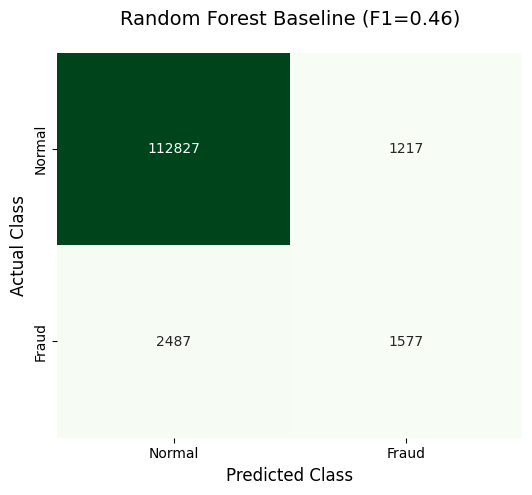

In [1]:
# ==========================================
# 2. COMPARATIVE MODEL: RANDOM FOREST (LEAKAGE-FREE)
# Strategy: Bagging Benchmark with Strict 80/20 Split
# ==========================================

import os
import gc
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# STEP 1: ROBUST DATA LOADING
# ---------------------------------------------------------
print("--- STEP 1: CHECKING DATA ---")

def force_download():
    # Check if data already exists
    if os.path.exists('train_transaction.csv'):
        print("✅ Data found. Loading...")
        return

    print("⚠️ Data not found. Starting Download...")

    # Check for Kaggle Token
    if not os.path.exists('/root/.kaggle/kaggle.json'):
        print("Please upload 'kaggle.json' file now:")
        uploaded = files.upload()
        # Move token to correct folder
        !mkdir -p ~/.kaggle
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json

    # Download
    !kaggle competitions download -c ieee-fraud-detection
    !unzip -o ieee-fraud-detection.zip
    !unzip -o train_transaction.csv.zip
    !unzip -o train_identity.csv.zip
    print("✅ Download & Unzip Complete.")

# Run the download check
force_download()

def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min, c_max = df[col].min(), df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max: df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max: df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max: df[col] = df[col].astype(np.int32)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max: df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max: df[col] = df[col].astype(np.float32)
    return df

print("Loading CSVs into Memory...")
train_trans = reduce_mem_usage(pd.read_csv('train_transaction.csv'))
train_id = reduce_mem_usage(pd.read_csv('train_identity.csv'))
df = pd.merge(train_trans, train_id, on='TransactionID', how='left')
del train_trans, train_id
gc.collect()

# ---------------------------------------------------------
# STEP 2: FEATURE ENGINEERING (LEAKAGE-FREE)
# ---------------------------------------------------------
print("\n--- STEP 2: ENGINEERING FEATURES (LEAKAGE-FREE) ---")

# 1. Sort by Time (Crucial for Time-Series logic)
df = df.sort_values('TransactionDT').reset_index(drop=True)

# A. Filtering
df = df.drop(columns=df.columns[df.isnull().mean() > 0.95])
df = df.drop(columns=df.nunique()[df.nunique() == 1].index)

# B. Imputation
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('Unknown')
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(-1)

# C. Timezone Fix
if 'id_14' in df.columns:
    df['id_14'] = df['id_14'].astype(str)

# D. Encoding
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# E. Context-Aware Features
df['hour'] = (df['TransactionDT'] // 3600) % 24
df['UID'] = df['card1'].astype(str) + '_' + df['addr1'].astype(str) + '_' + df['P_emaildomain'].astype(str)

# F. Behavioral Profiling (LEAKAGE-FREE UPDATE)
#  use expanding() windows so calculate stats based ONLY on past history.
print("Generating Behavioral Features (Expanding Windows)...")

# Velocity: Cumulative count up to current row
df['User_Trans_Count'] = df.groupby('UID').cumcount() + 1

# Spending Deviation: Expanding Mean
df['User_Mean_Amt'] = df.groupby('UID')['TransactionAmt'].transform(lambda x: x.expanding().mean())
df['Amt_Deviation'] = df['TransactionAmt'] / (df['User_Mean_Amt'] + 1e-5)

# Time Behavior: Expanding Mean per Hour
df['User_Hour_Mean'] = df.groupby(['UID', 'hour'])['TransactionAmt'].transform(lambda x: x.expanding().mean())
df['Time_Behavior_Deviation'] = df['TransactionAmt'] / (df['User_Hour_Mean'] + 1e-5)

print("✅ Features Created (Leakage-Free).")

# ---------------------------------------------------------
# STEP 3: TRAINING RANDOM FOREST
# ---------------------------------------------------------
print("\n--- STEP 3: SPLITTING & TRAINING (STRICT 80/20) ---")

# 1. Define Split Point (80% Train, 20% Test)
split_idx = int(len(df) * 0.8)

# 2. Create Train (Historical) and Test (Future)
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

print(f"Training Set (First 80%): {len(train_df):,} rows")
print(f"Testing Set  (Last 20%):  {len(test_df):,} rows")

exclude = ['isFraud', 'TransactionID', 'TransactionDT', 'UID', 'User_Mean_Amt', 'User_Hour_Mean']
features = [c for c in df.columns if c not in exclude]

X_train = train_df[features]
y_train = train_df['isFraud']
X_test = test_df[features]
y_test = test_df['isFraud']

print(f"Training Random Forest on {len(X_train)} rows with {len(features)} features...")
# Using 'balanced_subsample' to simulate Cost-Sensitive Learning in RF
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_leaf=4,
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

model.fit(X_train, y_train)
print("✅ Training Complete.")

# ---------------------------------------------------------
# STEP 4: RESULTS
# ---------------------------------------------------------
print("\n--- STEP 4: FINAL RESULTS (RANDOM FOREST) ---")

y_probs = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {auc:.4f}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
fscores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
ix = np.argmax(fscores)
print(f"Optimal Threshold: {thresholds[ix]:.4f}")
print(f"Max F1-Score: {fscores[ix]:.4f}")

y_pred = (y_probs >= thresholds[ix]).astype(int)
print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))


def plot_cm(y_true, y_pred, title, cmap='Blues'):
    """
    Generates a standard confusion matrix plot.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))

    # Heatmap with annotations
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=['Normal', 'Fraud'],
                yticklabels=['Normal', 'Fraud'])

    plt.title(title, fontsize=14, pad=20)
    plt.ylabel('Actual Class', fontsize=12)
    plt.xlabel('Predicted Class', fontsize=12)
    plt.show()

plot_cm(y_test, y_pred, f'Random Forest Baseline (F1={fscores[ix]:.2f})', cmap='Greens')

Total Features in Random Forest: 426

--- 📊 RANKING OF YOUR ENGINEERED FEATURES (RANDOM FOREST) 📊 ---
Feature Name              | Rank  | Importance   | Status
-----------------------------------------------------------------
User_Trans_Count          | #26   | 0.0097       | ✅ STRONG (Core)
Amt_Deviation             | #17   | 0.0110       | 🌟 STAR (Top 20)
Time_Behavior_Deviation   | #27   | 0.0097       | ✅ STRONG (Core)
User_Mean_Amt             | ----  | 0.0000       | ❌ NOT USED
User_Hour_Mean            | ----  | 0.0000       | ❌ NOT USED
hour                      | #52   | 0.0060       | 🔹 SUPPORTIVE

--- 🏆 COMPARISON WITH #1 FEATURE ---
Top Feature is: C13 (Score: 0.0286)


/tmp/ipython-input-3717110343.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=plot_df, palette=colors)


✅ Graph saved as Random_Forest_Top20_Features.png


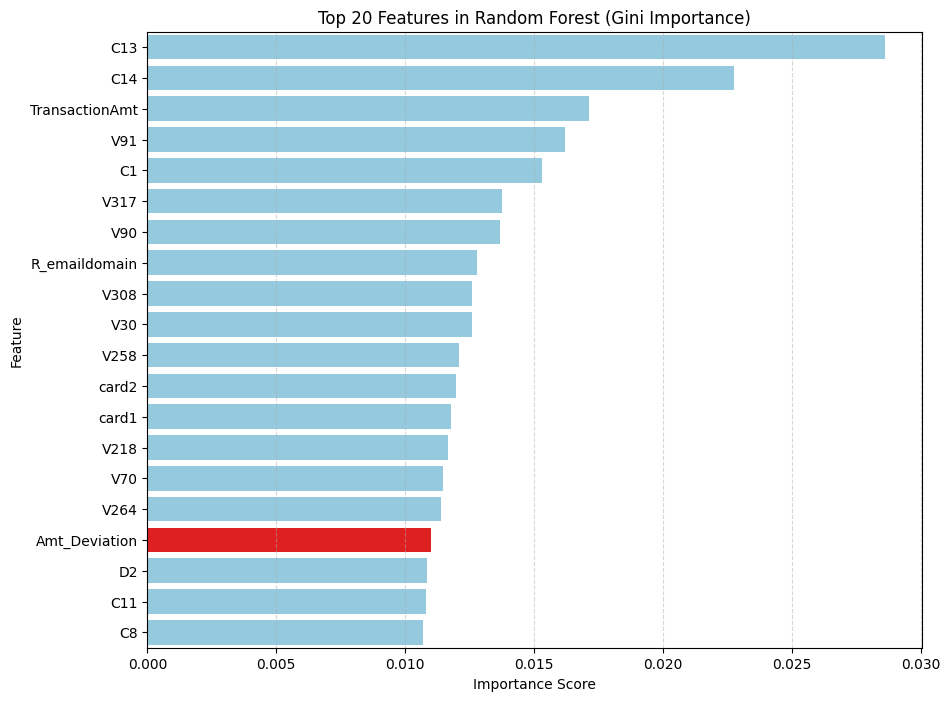

In [2]:
# ==========================================
# THESIS VALIDATION: RANDOM FOREST FEATURE RANKING
# Metric: Gini Importance (Mean Decrease in Impurity)
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract Feature Importance
# Random Forest in sklearn uses 'feature_importances_'
importances = model.feature_importances_

# Create DataFrame
imp_df = pd.DataFrame({
    'Feature': features,  # Uses the 'features' list from training step
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Add Rank Column
imp_df['Rank'] = imp_df.index + 1

# 2. Define Your Engineered Features
my_features = [
    'User_Trans_Count',         # Velocity
    'Amt_Deviation',            # Contextual Spending
    'Time_Behavior_Deviation',  # Contextual Timing
    'User_Mean_Amt',            # User Habit
    'User_Hour_Mean',           # User Context
    'hour'                      # Temporal
]

print(f"Total Features in Random Forest: {len(imp_df)}")
print("\n--- 📊 RANKING OF YOUR ENGINEERED FEATURES (RANDOM FOREST) 📊 ---")
print(f"{'Feature Name':<25} | {'Rank':<5} | {'Importance':<12} | {'Status'}")
print("-" * 65)

found_features = []
for feat in my_features:
    if feat in imp_df['Feature'].values:
        row = imp_df[imp_df['Feature'] == feat].iloc[0]
        rank = int(row['Rank'])
        score = row['Importance']

        # Thesis Interpretation Status
        if rank <= 20: status = "🌟 STAR (Top 20)"
        elif rank <= 50: status = "✅ STRONG (Core)"
        elif rank <= 150: status = "🔹 SUPPORTIVE"
        else: status = "🔸 WEAK"

        # Formatting score to 4 decimal places since Gini scores sum to 1.0
        print(f"{feat:<25} | #{rank:<4} | {score:<12.4f} | {status}")
        found_features.append(feat)
    else:
        print(f"{feat:<25} | ----  | 0.0000       | ❌ NOT USED")

# 3. Compare with Top 1 Feature
top_feat = imp_df.iloc[0]
print("\n--- 🏆 COMPARISON WITH #1 FEATURE ---")
print(f"Top Feature is: {top_feat['Feature']} (Score: {top_feat['Importance']:.4f})")

# 4. Visualization (For Thesis Figure)
if len(found_features) > 0:
    # plot the Top 20 features to see where yours stand
    plot_df = imp_df.head(20)

    plt.figure(figsize=(10, 8))
    # Highlight your features in a different color (e.g., Red)
    colors = ['red' if x in my_features else 'skyblue' for x in plot_df['Feature']]

    sns.barplot(x='Importance', y='Feature', data=plot_df, palette=colors)
    plt.title('Top 20 Features in Random Forest (Gini Importance)')
    plt.xlabel('Importance Score')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.savefig('Random_Forest_Top20_Features.png', bbox_inches='tight', dpi=300)
    print("✅ Graph saved as Random_Forest_Top20_Features.png")
    plt.show()